# Extract fit and true values

In [108]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import os, sys
import re
from pyLIMA import telescopes
from pyLIMA.models import PSBL_model
from pyLIMA.models import USBL_model
from pyLIMA.models import FSPLarge_model
from pyLIMA.outputs import pyLIMA_plots
from pyLIMA.outputs import pyLIMA_plots
from pyLIMA import event
from tqdm.auto import tqdm
from astropy.time import Time
home = '/home/anibal/'
sys.path.append(home + '/roman_rubin/fit_codes')
# this codes are in the /fit_codes directory 
# https://github.com/anibal-art/roman_rubin/tree/main/fit_codes
from fit_results import chi_dof, best_model, event_fits, sigmas
# from fit_results import 
from filter_curves import read_curves
from analysis_metrics import m1,m2,m3, fit_true, metrics, sigma_ratio, bias_ratio, fit_values
from plot_models import plot_LCmodel
from plot_lightcurves import model
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from plot_models import plot_only_model

In [19]:
path_ephemerides = '/home/anibal/files_db/james_webb.txt' #PATH TO EPHEMERIDES
path = '/home/anibal/results_roman_rubin/FFP_v6/FFP_u0/FFP/'
# path = '/home/anibal/results_roman_rubin/FFP_GS/FFP/'

# path_model = ['set_sim'+str(i) for i in range(1,9)]
# path_fit = ['set_fit'+str(i) for i in range(1,9)]
# path = '/home/anibal/results_roman_rubin/PB_v2/PB/'
save_results = path+'results/'
path_model = ['set_sim'+str(i)+'/' for i in range(1,9)]
path_fit = ['set_fit'+str(i)+'/' for i in range(1,9)]

path_set_sim = [path+'set_sim'+str(i)+'/' for i in range(1,9)]
path_set_fit = [path+'set_fit'+str(i)+'/' for i in range(1,9)]


In [20]:
label = {'piEE':'\\pi_{EE}','piEN':'\\pi_{EN}','rho':'\\rho','t0':'t_0','te':'t_E','u0':'u_0','s':'s','q':'q','alpha':'\\alpha', 'piE':'\\pi_E'}
print(len(label))
labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}


10


In [21]:
# test 
# events = event_fits(path+path_fit[0])
# file_name = [path+path_model[0]+f for f in os.listdir(path+path_model[0]) if 'txt' in f] 
# fit_name = [path+path_fit[5]+f for f in os.listdir(path+path_fit[5]) if 'RR' in f] 
# curves,params = read_curves(file_name[0])

In [22]:
try:
    fit_rr = pd.read_csv(save_results+'fit_rr_ffp.csv')
    fit_roman = pd.read_csv(save_results+'fit_roman_ffp.csv')
    true = pd.read_csv(save_results+'true_ffp.csv')
except:
    fit_rr, fit_roman, true = fit_true(path)
    fit_rr.to_csv(save_results+'fit_rr_ffp.csv', index=False)
    fit_roman.to_csv(save_results+'fit_roman_ffp.csv', index=False)
    true.to_csv(save_results+'true_ffp.csv', index=False)

In [23]:
# plt.hist(np.sqrt(true['piEE']**2 + true['piEN']**2))
# plt.xlabel(r'$\pi_E$',fontsize=20)
# plt.yscale('log')
# plt.show()

0 0 t0
0 1 u0
0 2 te
0 3 rho
0 4 piEN
1 0 piEE


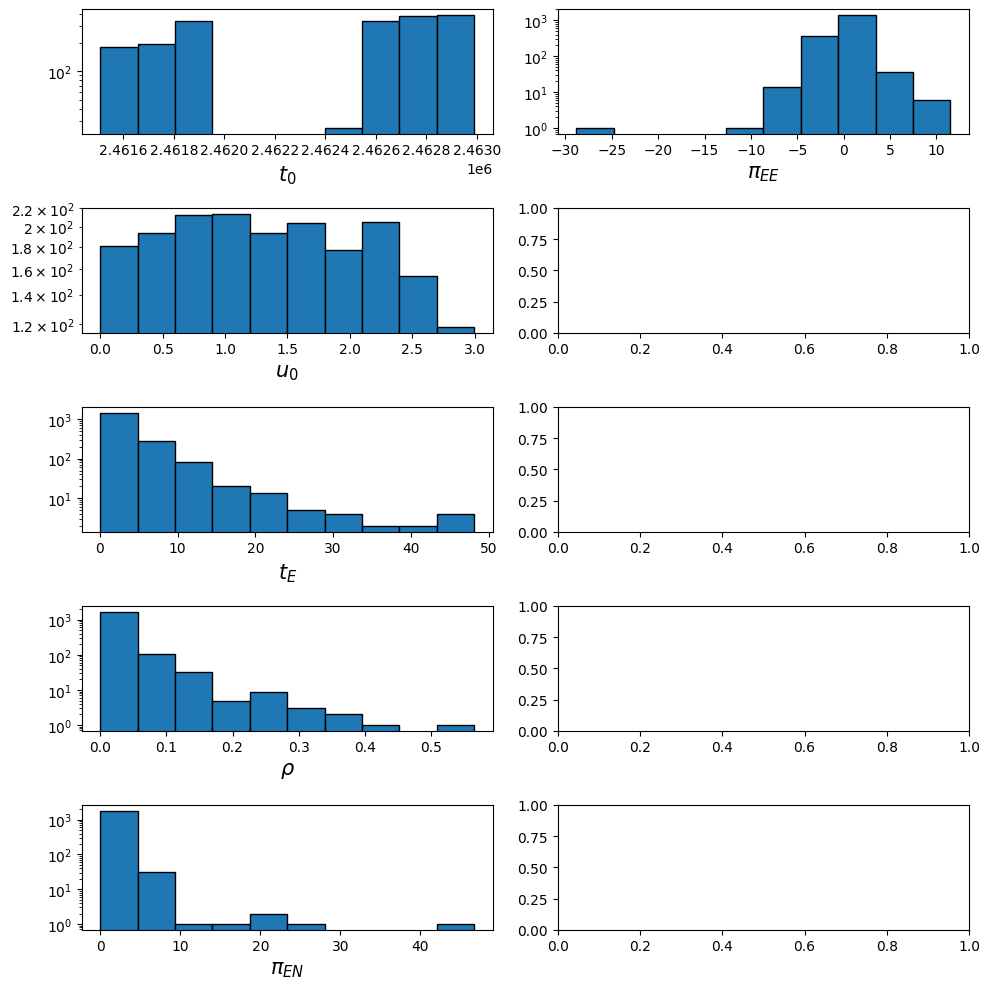

In [24]:

fig, axs = plt.subplots(int(len(label)/2), 2, figsize=(10,10))
for i,p in enumerate(true.columns[1:]):
    row, col = divmod(i, int(len(label)/2))
    print(row,col,p)
    # axs[col,row].hist(true[p])
    axs[col,row].hist(true[p],edgecolor='black')
    axs[col,row].set_xlabel(f'${label[p]}$',fontsize=15)
    axs[col,row].set_yscale('log')
    if p == 'piE':
        axs[col,row].hist(hist(np.sqrt(true['piEE']**2 + true['piEN']**2)),edgecolor='black')
        axs[col,row].set_xlabel(f'${label[p]}$',fontsize=15)
        axs[col,row].set_yscale('log')

plt.tight_layout()
plt.show()

In [25]:
len(true)

1852

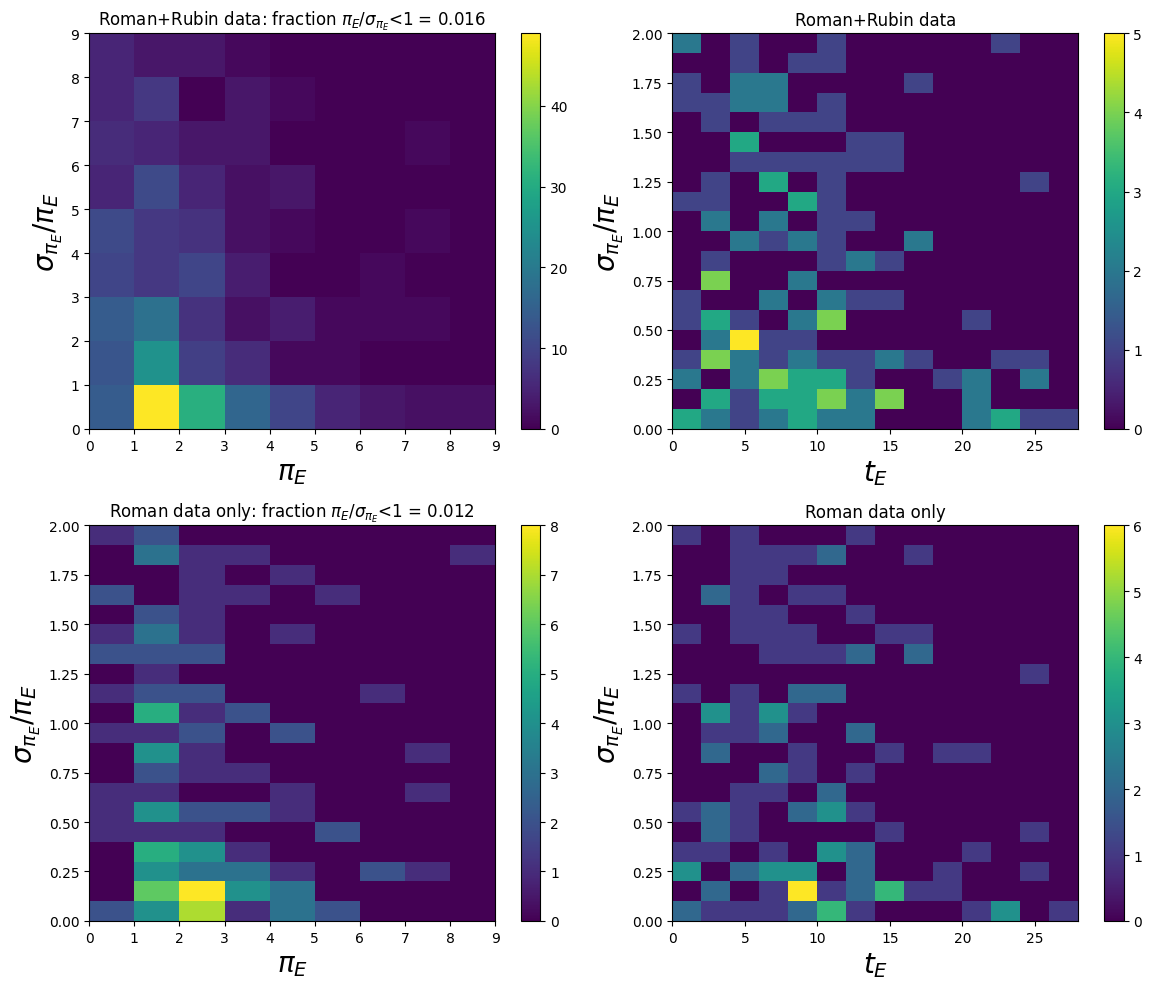

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data and fits defined as fit_rr and fit_roman

# Create a figure and a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Roman+Rubin data - subplot (0, 0)

piE_rr = np.sqrt(fit_rr['piEN']**2 + fit_rr['piEE']**2)
sigma_piE_rr = (1/piE_rr) * np.sqrt((fit_rr['piEN']*fit_rr['piEN_err'])**2 + (fit_rr['piEE']*fit_rr['piEE_err'])**2)
f_rr = [f for f in sigma_piE_rr/piE_rr if f<0.1]
fraction_roman = len(f_rr)/len(sigma_piE_rr/piE_rr)
axs[0, 0].set_title('Roman+Rubin data: fraction $\pi_{E}/\sigma_{\pi_{E}}$<1 = '+str(round(fraction_roman,3)))
h = axs[0, 0].hist2d(piE_rr, sigma_piE_rr/piE_rr, bins=(np.arange(0, 10, 1), np.arange(0, 10, 1)))
axs[0, 0].set_xlabel(r'$\pi_{E}$', fontsize=20)
axs[0, 0].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[0,0])  # Add color bar to the subplot


# Plot for Roman+Rubin data - subplot (0, 1)
axs[0, 1].set_title('Roman+Rubin data')
# piE_rr = np.sqrt(fit_rr['piEN']**2 + fit_rr['piEE']**2)
sigma_piE_rr = (1/piE_rr) * np.sqrt((fit_rr['piEN']*fit_rr['piEN_err'])**2 + (fit_rr['piEE']*fit_rr['piEE_err'])**2)
h=axs[0, 1].hist2d(fit_rr['te'], sigma_piE_rr/piE_rr, bins=(np.arange(0, 30, 2), np.arange(0, 2+0.1, 0.1)))
axs[0, 1].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
axs[0, 1].set_xlabel(r'$t_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[0,1])  # Add color bar to the subplot
# Plot for Roman data only - subplot (1, 0)

piE_roman = np.sqrt(fit_roman['piEN']**2 + fit_roman['piEE']**2)
sigma_piE_roman = (1/piE_roman) * np.sqrt((fit_roman['piEN']*fit_roman['piEN_err'])**2 + (fit_roman['piEE']*fit_roman['piEE_err'])**2)
sigma_piE_roman = (1/piE_roman) * np.sqrt((fit_roman['piEN']*fit_roman['piEN_err'])**2 + (fit_roman['piEE']*fit_roman['piEE_err'])**2)
f_roman = [f for f in sigma_piE_roman/piE_roman if f<0.1]
fraction_roman = len(f_roman)/len(sigma_piE_roman/piE_roman)
axs[1, 0].set_title('Roman data only: fraction $\pi_{E}/\sigma_{\pi_{E}}$<1 = '+str(round(fraction_roman,3)))
h=axs[1, 0].hist2d(piE_roman, sigma_piE_roman/piE_roman, bins=(np.arange(0, 10, 1), np.arange(0, 2+0.1, 0.1)))
axs[1, 0].set_xlabel(r'$\pi_{E}$', fontsize=20)
axs[1, 0].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[1,0])  # Add color bar to the subplot
# Plot for Roman data only - subplot (1, 1)

# piE_roman = np.sqrt(fit_roman['piEN']**2 + fit_roman['piEE']**2)
axs[1, 1].set_title('Roman data only')
h=axs[1, 1].hist2d(fit_roman['te'], sigma_piE_roman/piE_roman, bins=(np.arange(0, 30, 2), np.arange(0, 2+0.1, 0.1)))
axs[1, 1].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
axs[1, 1].set_xlabel(r'$t_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[1,1])  # Add color bar to the subplot
# axs[1, 1].set_colorbar()
# Adjust layout to prevent clipping of titles
plt.tight_layout()
# Show the plot
plt.show()


# Veamos las metricas

## defino funciones

In [27]:
# save_results = '/home/anibal/results_roman_rubin/FFP_v5/FFP/results/'

try:
    met_1_rr = pd.read_csv(save_results+'met_1_rr_ffp.csv')
    met_1_roman = pd.read_csv(save_results+'met_1_roman_ffp.csv')
    met_2_rr = pd.read_csv(save_results+'met_2_rr_ffp.csv')
    met_2_roman = pd.read_csv(save_results+'met_2_roman_ffp.csv')
    met_3_rr = pd.read_csv(save_results+'met_3_rr_ffp.csv')
    met_3_roman = pd.read_csv(save_results+'met_3_roman_ffp.csv')
    err_ratio = pd.read_csv(save_results+'err_ratio_ffp.csv')
    residuals_ratio = pd.read_csv(save_results+'bias_ratio_ffp.csv')
except:
    err_ratio, residuals_ratio, met_1_rr, met_1_roman, met_2_rr, met_2_roman, met_3_rr, met_3_roman = metrics(path)
    met_1_rr.to_csv(save_results+'met_1_rr_ffp.csv', index=False)
    met_1_roman.to_csv(save_results+'met_1_roman_ffp.csv', index=False)
    met_2_rr.to_csv(save_results+'met_2_rr_ffp.csv', index=False)
    met_2_roman.to_csv(save_results+'met_2_roman_ffp.csv', index=False)
    met_3_rr.to_csv(save_results+'met_3_rr_ffp.csv', index=False)
    met_3_roman.to_csv(save_results+'met_3_roman_ffp.csv', index=False)
    err_ratio.to_csv(save_results+'err_ratio_ffp.csv', index=False)
    residuals_ratio.to_csv(save_results+'bias_ratio_ffp.csv', index=False)

## Distribuciones de las metricas


/tmp/ipykernel_54965/1049266532.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


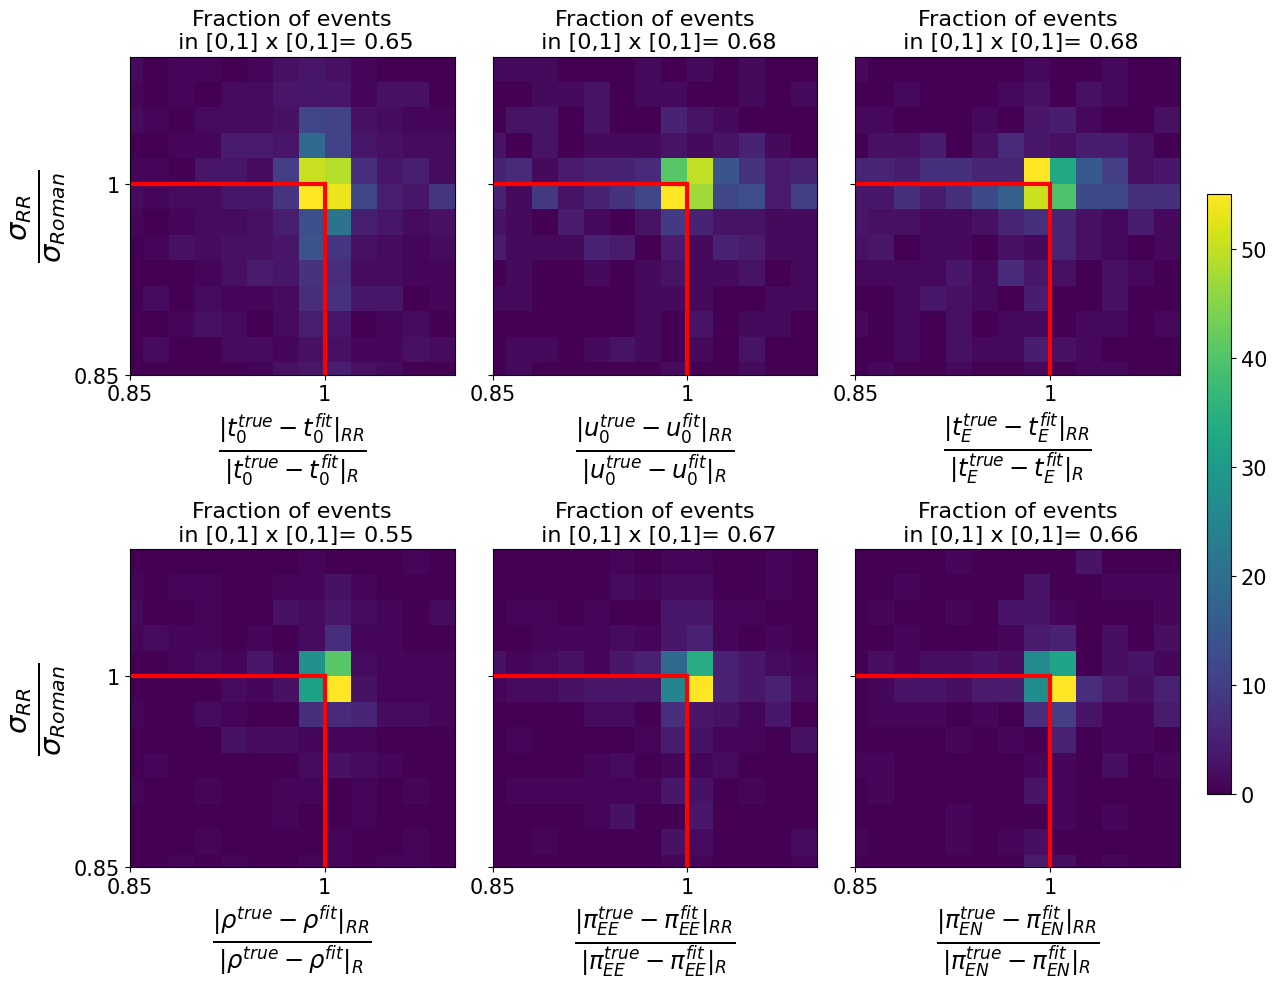

In [28]:
def plot_comparisons(err_ratio, residuals_ratio,opsim,model):
    fractions = []
    labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}
    # Define your data and properties as given in your code
    if 'PSPL' in model:
        properties = ('t0', 'u0', 'te', 'piEE', 'piEN')
    elif 'USPL' in model:
        properties = ('t0', 'u0', 'te','rho', 'piEE', 'piEN')
    else:
        properties = ('t0', 'u0', 'te','rho', 's', 'q', 'alpha', 'piEE', 'piEN')
    fig, axs = plt.subplots(2,3, figsize=(12, 10),sharey=True)
    cbar_axs = [fig.add_axes([1.01, 0.2, 0.02, 0.6])]#,  # Color bar for the first row
    Categories = {'B':'Roman gap but Rubin season','C':'Rubin gap but Roman season','D':'Overlap seasons'}
    n=1
    for i, p in enumerate(properties):
        row, col = divmod(i, 3)  # Calculate the row and column index for the current subplot
        # m1_ratio = met_1_ratio[met_1_ratio['source'].isin(df_cat['source'][df_cat['cat']==cat].values.astype(int))]
        # print(len(m1_ratio))
        im = axs[row, col].hist2d(residuals_ratio[p]
                                  , err_ratio[p], bins=[np.arange(0, 1.2, 0.02), np.arange(0., 1.2, 0.02)])
        # print(len(m1_ratio[p]))
        label_m1 = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|_{RR}}{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|_{R}}$'#+f'{labels[p]}'+'^{true}}$'#+r'$\frac{|'+f'{p}'+'^{true}-'+f'{p}'+'^{fit}|_{RR}}{'+f'{p}'+'^{true}}$'
        axs[row, col].set_xlabel(label_m1,fontsize=25)
        axs[row, col].set_xticks([0.85,1,1.15],[0.85,1,1.15],fontsize=15)
        axs[row, col].set_yticks([0.85,1,1.15],[0.85,1,1.15],fontsize=15)
        # Calculate the number of events in [0,1] x [0,1] square
        x_min, x_max = 0, 1
        y_min, y_max = 0, 1
        axs[row, col].plot(np.linspace(0.,1,15),np.ones(15),color='red',marker=' ', linestyle='-',lw=3)
        axs[row, col].plot(np.ones(15),np.linspace(0.,1,15),color='red',marker=' ', linestyle='-',lw=3)
        axs[row, col].plot(np.linspace(0.,1,15),np.ones(15)*0,color='red',marker=' ', linestyle='-',lw=3)
        axs[row, col].plot(np.ones(15)*0,np.linspace(0.,1,15),color='red',marker=' ', linestyle='-',lw=3)

        df = err_ratio[(err_ratio[p]<y_max) & (err_ratio[p]>y_min)]
        # display(df)
#         # df0 = residuals_ratio[residuals_ratio['source'].isin(df_cat['source'][df_cat['cat']==cat].values.astype(int))]
        number_in_square = len(df[(df[p] <x_max) & (df[p] >x_min)])/len(residuals_ratio)
        
#         # Label for the text annotation
        text_x = 1  # X-coordinate for the text
        text_y = 0.4  # Y-coordinate for the text (negative to go below the figure)
        text = f"Fraction of events\n in [{x_min},{x_max}] x [{y_min},{y_max}]= {round(number_in_square ,2)}"  # Insert the number here
        axs[row, col].set_title(text, fontsize = 16)

        if col == 0:
            axs[row, col].set_ylabel(r'$\frac{ \sigma_{RR} }{\sigma_{Roman}}$',fontsize=30)

        axs[row, col].set_xlim(0.85,1.1)
        axs[row, col].set_ylim(0.85, 1.1)

        fig.colorbar(im[3], cax=cbar_axs[0])
        cbar = fig.colorbar(im[3], cax=cbar_axs[0])
        cbar.ax.tick_params(labelsize=15)
    # plt.suptitle(opsim  +f' {model} - '+Categories[cat],fontsize=30)    
    plt.tight_layout()
    # plt.savefig(f'/home/anibal/FIGURES_roman_rubin/{model}_{opsim}_{cat}.png')
    plt.show()

cat = 'D'
plot_comparisons(err_ratio, residuals_ratio, 'Baseline', 'USPL')

In [29]:
# x_min, x_max = 0, 1
# y_min, y_max = 0, 1
# df = err_ratio['Source'][(err_ratio[p]<y_max) & (err_ratio[p]>y_min)].values
# print(df)
# residuals_ratio[residuals_ratio['Source']]

# residuals_ratio[residuals_ratio['source'].isin(df_cat['source'][df_cat['cat']==cat].values.astype(int))]


### bias/true

0.8704103671706264
0.9524838012958964
0.029697624190064796
0.047516198704103674


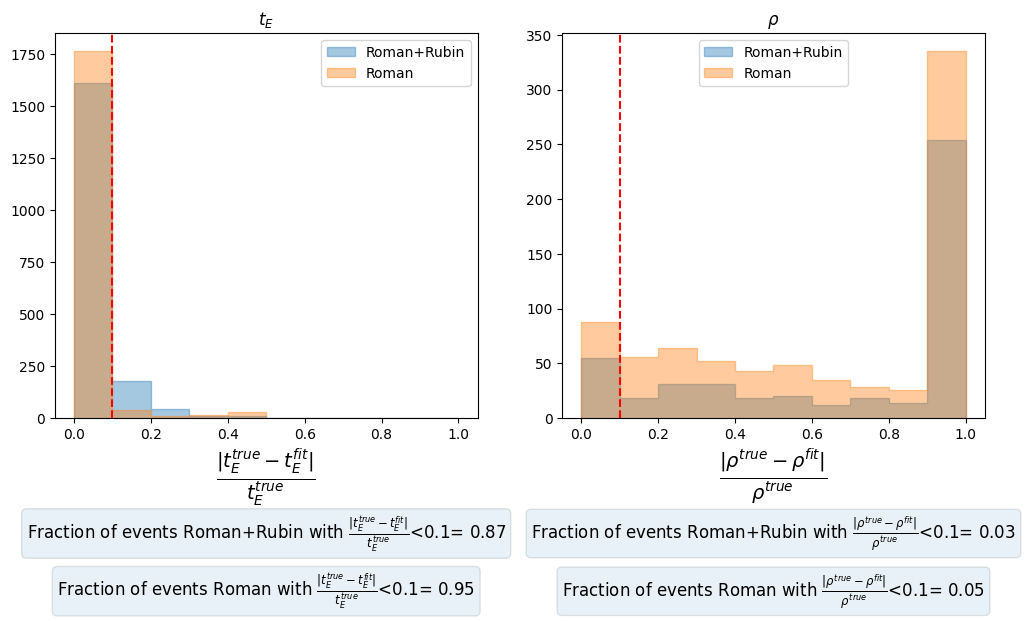

0.7375809935205183


In [30]:
import matplotlib.pyplot as plt

label_m1 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}'+'}$'


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the left subplot

p = 'te'
axes[0].set_title(f'${labels[p]}$')
axes[0].hist(met_1_rr[p],bins=np.arange(0,1.1,0.1),fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[0].hist(met_1_roman[p], bins=np.arange(0,1.1,0.1),fill=True, alpha=0.4,histtype='step', label='Roman')
axes[0].set_xlabel(label_m1(p), fontsize=20)
axes[0].axvline(0.1, color='red',linestyle='--')
axes[0].legend(loc='best')
# axes[0].set_yscale('log')
print(len(met_1_rr[met_1_rr[p]<0.1])/len(met_1_rr))
print(len(met_1_roman[met_1_roman[p]<0.1])/len(met_1_roman))

axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m1(p) +'<0.1'+f'= {len(met_1_rr[met_1_rr[p] < 0.1]) / len(met_1_rr):.2f}', 
                 xy=(0.5, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m1(p) +'<0.1'+f'= {len(met_1_roman[met_1_roman[p] < 0.1]) / len(met_1_roman):.2f}', 
                 xy=(0.5, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))


# Plot the second histogram on the right subplot

q = 'rho'
axes[1].set_title(f'${labels[q]}$')
axes[1].hist(met_1_rr[q],bins=np.arange(0,1.1,0.1), fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[1].hist(met_1_roman[q],bins=np.arange(0,1.1,0.1), histtype='step', fill=True, alpha=0.4, label='Roman')
axes[1].set_xlabel(label_m1(q), fontsize=20)
axes[1].legend(loc='best')
axes[1].axvline(0.1, color='red',linestyle='--')
print(len(met_1_rr[met_1_rr[q]<0.1])/len(met_1_rr))
print(len(met_1_roman[met_1_roman[q]<0.1])/len(met_1_roman))
# Adjust layout for better spacing
# plt.tight_layout()
axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m1(q) +'<0.1'+f'= {len(met_1_rr[met_1_rr[q] < 0.1]) / len(met_1_rr):.2f}', 
                 xy=(1.7, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m1(q) +'<0.1'+f'= {len(met_1_roman[met_1_roman[q] < 0.1]) / len(met_1_roman):.2f}', 
                 xy=(1.7, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
# Show the plot
plt.show()
print(len(met_1_roman['piEN'][met_1_roman['piEN']<0.2])/len(met_1_roman['piEN']))

0.22786177105831534
0.4584233261339093
0.46760259179265656
0.6754859611231101


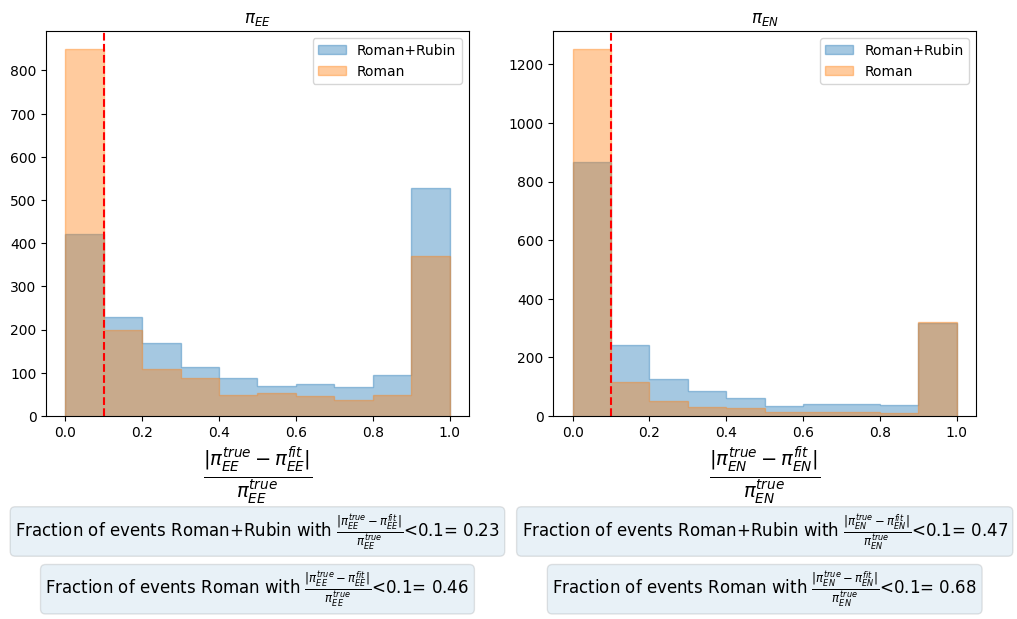

0.7375809935205183


In [31]:

label_m1 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}'+'}$'


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the left subplot

p = 'piEE'
axes[0].set_title(f'${labels[p]}$')
axes[0].hist(met_1_rr[p],bins=np.arange(0,1.1,0.1),fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[0].hist(met_1_roman[p], bins=np.arange(0,1.1,0.1),fill=True, alpha=0.4,histtype='step', label='Roman')
axes[0].set_xlabel(label_m1(p), fontsize=20)
axes[0].axvline(0.1, color='red',linestyle='--')
axes[0].legend(loc='best')
# axes[0].set_yscale('log')
print(len(met_1_rr[met_1_rr[p]<0.1])/len(met_1_rr))
print(len(met_1_roman[met_1_roman[p]<0.1])/len(met_1_roman))

axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m1(p) +'<0.1'+f'= {len(met_1_rr[met_1_rr[p] < 0.1]) / len(met_1_rr):.2f}', 
                 xy=(0.5, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m1(p) +'<0.1'+f'= {len(met_1_roman[met_1_roman[p] < 0.1]) / len(met_1_roman):.2f}', 
                 xy=(0.5, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))


# Plot the second histogram on the right subplot

q = 'piEN'
axes[1].set_title(f'${labels[q]}$')
axes[1].hist(met_1_rr[q],bins=np.arange(0,1.1,0.1), fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[1].hist(met_1_roman[q],bins=np.arange(0,1.1,0.1), histtype='step', fill=True, alpha=0.4, label='Roman')
axes[1].set_xlabel(label_m1(q), fontsize=20)
axes[1].legend(loc='best')
axes[1].axvline(0.1, color='red',linestyle='--')
print(len(met_1_rr[met_1_rr[q]<0.1])/len(met_1_rr))
print(len(met_1_roman[met_1_roman[q]<0.1])/len(met_1_roman))
# Adjust layout for better spacing
# plt.tight_layout()
axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m1(q) +'<0.1'+f'= {len(met_1_rr[met_1_rr[q] < 0.1]) / len(met_1_rr):.2f}', 
                 xy=(1.7, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m1(q) +'<0.1'+f'= {len(met_1_roman[met_1_roman[q] < 0.1]) / len(met_1_roman):.2f}', 
                 xy=(1.7, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
# Show the plot
plt.show()
print(len(met_1_roman['piEN'][met_1_roman['piEN']<0.2])/len(met_1_roman['piEN']))

### bias/sigma

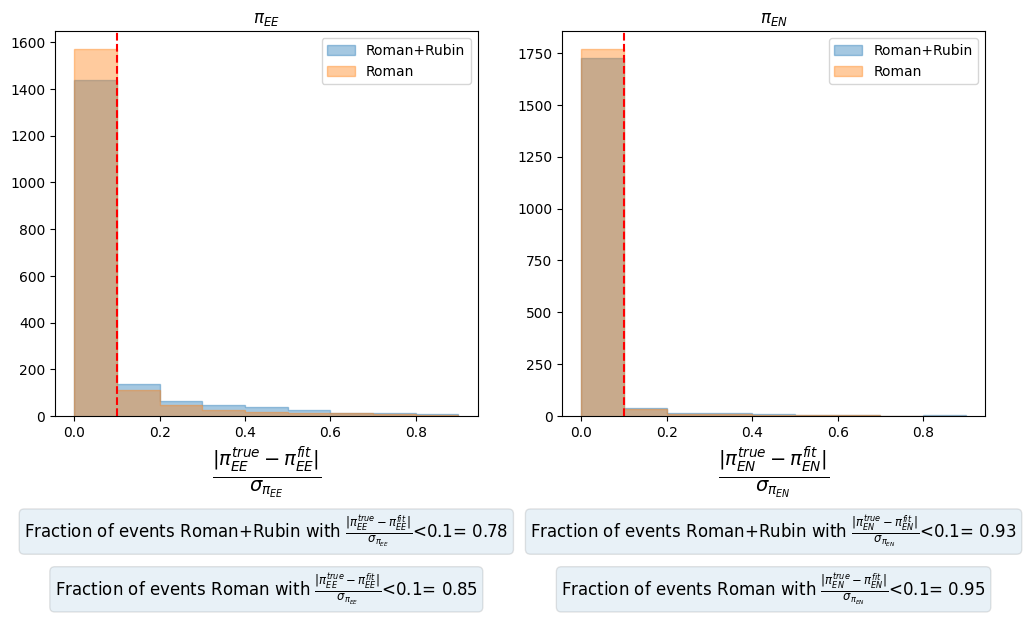

In [32]:
label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot the first histogram on the left subplot
p = 'piEE'
axes[0].set_title(f'${labels[p]}$')
axes[0].hist(met_2_rr[p],bins=np.arange(0,1,0.1),fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[0].hist(met_2_roman[p], bins=np.arange(0,1,0.1),fill=True, alpha=0.4,histtype='step', label='Roman')
axes[0].set_xlabel(label_m2(p), fontsize=20)
axes[0].axvline(0.1, color='red',linestyle='--')
axes[0].legend(loc='best')
# axes[0].set_yscale('log')
# print(len(met_1_rr[met_1_rr[p]<0.1])/len(met_1_rr))
# print(len(met_1_roman[met_1_roman[p]<0.1])/len(met_1_roman))
axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m2(p) +'<0.1'+f'= {len(met_2_rr[met_2_rr[p] < 0.1]) / len(met_2_rr):.2f}', 
                 xy=(0.5, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m2(p) +'<0.1'+f'= {len(met_2_roman[met_2_roman[p] < 0.1]) / len(met_2_roman):.2f}', 
                 xy=(0.5, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
# Plot the second histogram on the right subplot

q = 'piEN'
axes[1].set_title(f'${labels[q]}$')
axes[1].hist(met_2_rr[q],bins=np.arange(0,1,0.1), fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[1].hist(met_2_roman[q],bins=np.arange(0,1,0.1), histtype='step', fill=True, alpha=0.4, label='Roman')
axes[1].set_xlabel(label_m2(q), fontsize=20)
axes[1].legend(loc='best')
axes[1].axvline(0.1, color='red',linestyle='--')
# print(len(met_1_rr[met_1_rr[q]<0.1])/len(met_1_rr))
# print(len(met_1_roman[met_1_roman[q]<0.1])/len(met_1_roman))
# Adjust layout for better spacing
# plt.tight_layout()
axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m2(q) +'<0.1'+f'= {len(met_2_rr[met_2_rr[q] < 0.1]) / len(met_2_rr):.2f}', 
                 xy=(1.7, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m2(q) +'<0.1'+f'= {len(met_2_roman[met_2_roman[q] < 0.1]) / len(met_2_roman):.2f}', 
                 xy=(1.7, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
# Show the plot
plt.show()


### relative error

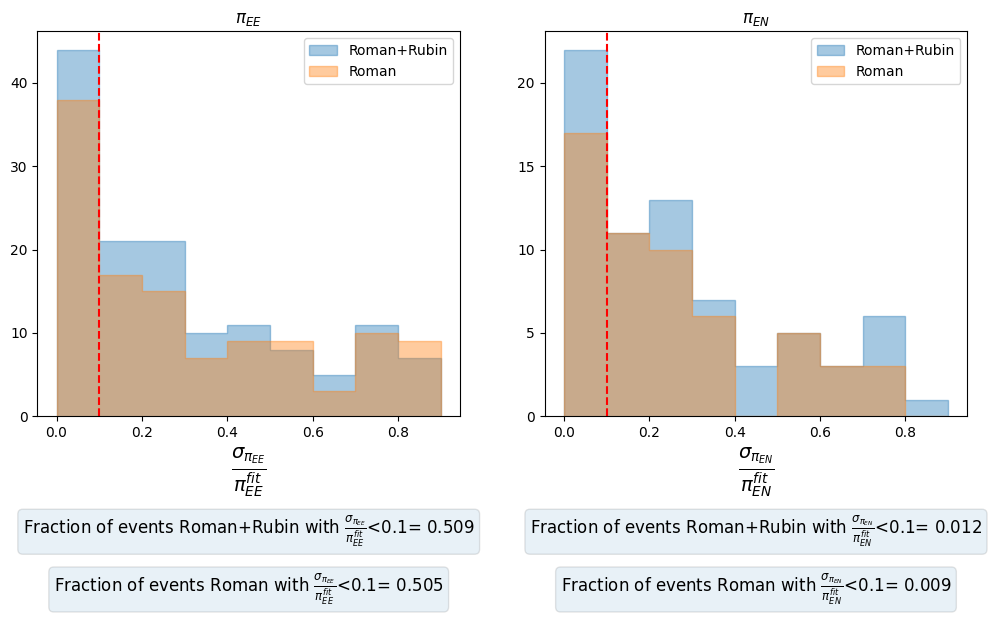

In [33]:

label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the left subplot
min_bin = 0
max_bin = 1
len_bin = (max_bin-min_bin)/10

p = 'piEE'
axes[0].set_title(f'${labels[p]}$')
axes[0].hist(met_3_rr[p],bins=np.arange(min_bin,max_bin,len_bin),fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[0].hist(met_3_roman[p], bins=np.arange(min_bin,max_bin,len_bin),fill=True, alpha=0.4,histtype='step', label='Roman')
axes[0].set_xlabel(label_m3(p), fontsize=20)
axes[0].axvline(0.1, color='red',linestyle='--')
axes[0].legend(loc='best')
# axes[0].set_yscale('log')
# print(len(met_1_rr[met_1_rr[p]<0.1])/len(met_1_rr))
# print(len(met_1_roman[met_1_roman[p]<0.1])/len(met_1_roman))

axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m3(p) +'<0.1'+f'= {len(met_3_rr[met_3_rr[p] < 0.1]) / len(met_3_rr):.3f}', 
                 xy=(0.5, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m3(p) +'<0.1'+f'= {len(met_3_roman[met_3_roman[p] < 0.1]) / len(met_3_roman):.3f}', 
                 xy=(0.5, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))


# Plot the second histogram on the right subplot

q = 'piEN'
min_bin = 0
max_bin = 1
len_bin = (max_bin-min_bin)/10

axes[1].set_title(f'${labels[q]}$')
axes[1].hist(met_3_rr[q],bins=np.arange(min_bin,max_bin,len_bin), fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[1].hist(met_3_roman[q],bins=np.arange(min_bin,max_bin,len_bin), histtype='step', fill=True, alpha=0.4, label='Roman')
axes[1].set_xlabel(label_m3(q), fontsize=20)
axes[1].legend(loc='best')
axes[1].axvline(0.1, color='red',linestyle='--')
# print(len(met_1_rr[met_1_rr[q]<0.1])/len(met_1_rr))
# print(len(met_1_roman[met_1_roman[q]<0.1])/len(met_1_roman))
# Adjust layout for better spacing
# plt.tight_layout()
axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m3(q) +'<0.1'+f'= {len(met_3_rr[met_3_rr[q] < 0.1]) / len(met_3_rr):.3f}', 
                 xy=(1.7, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with ' + label_m3(q) + '<0.1'+f'= {len(met_3_roman[met_3_roman[q] < 0.1]) / len(met_3_roman):.3f}', 
                 xy=(1.7, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
# Show the plot
plt.show()


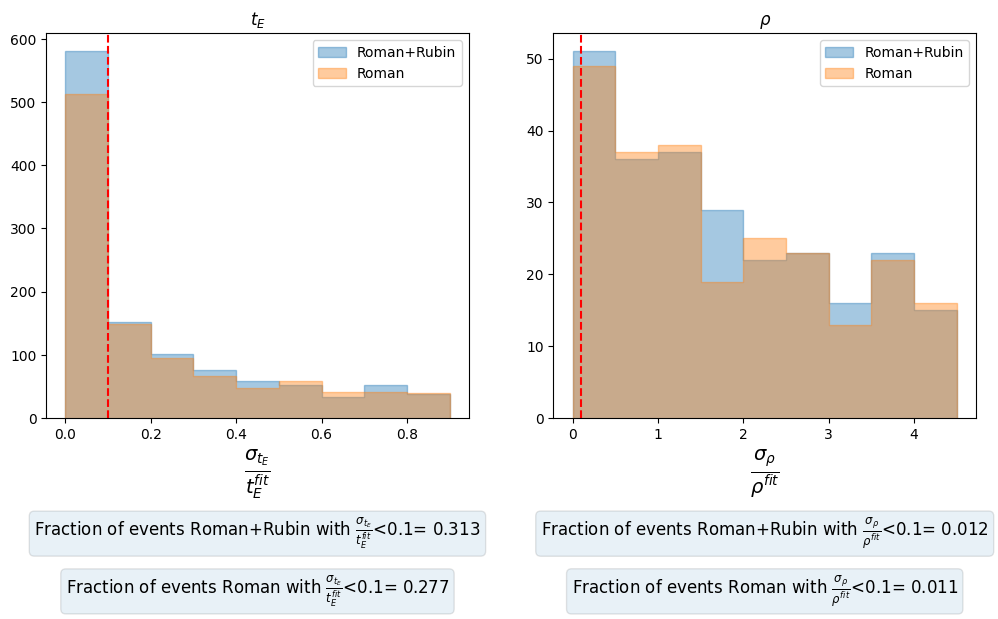

In [34]:

label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot the first histogram on the left subplot
min_bin = 0
max_bin = 1
len_bin = (max_bin-min_bin)/10
p = 'te'
axes[0].set_title(f'${labels[p]}$')
axes[0].hist(met_3_rr[p],bins=np.arange(min_bin,max_bin,len_bin),fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[0].hist(met_3_roman[p], bins=np.arange(min_bin,max_bin,len_bin),fill=True, alpha=0.4,histtype='step', label='Roman')
axes[0].set_xlabel(label_m3(p), fontsize=20)
axes[0].axvline(0.1, color='red',linestyle='--')
axes[0].legend(loc='best')
# axes[0].set_yscale('log')
# print(len(met_1_rr[met_1_rr[p]<0.1])/len(met_1_rr))
# print(len(met_1_roman[met_1_roman[p]<0.1])/len(met_1_roman))
axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m3(p) +'<0.1'+f'= {len(met_3_rr[met_3_rr[p] < 0.1]) / len(met_3_rr):.3f}', 
                 xy=(0.5, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with '+ label_m3(p) +'<0.1'+f'= {len(met_3_roman[met_3_roman[p] < 0.1]) / len(met_3_roman):.3f}', 
                 xy=(0.5, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))

# Plot the second histogram on the right subplot

q = 'rho'
min_bin = 0
max_bin = 5
len_bin = (max_bin-min_bin)/10
axes[1].set_title(f'${labels[q]}$')
axes[1].hist(met_3_rr[q],bins=np.arange(min_bin,max_bin,len_bin), fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
axes[1].hist(met_3_roman[q],bins=np.arange(min_bin,max_bin,len_bin), histtype='step', fill=True, alpha=0.4, label='Roman')
axes[1].set_xlabel(label_m3(q), fontsize=20)
axes[1].legend(loc='best')
axes[1].axvline(0.1, color='red',linestyle='--')
# print(len(met_1_rr[met_1_rr[q]<0.1])/len(met_1_rr))
# print(len(met_1_roman[met_1_roman[q]<0.1])/len(met_1_roman))
# Adjust layout for better spacing
# plt.tight_layout()
axes[0].annotate('Fraction of events Roman+Rubin with '+ label_m3(q) +'<0.1'+f'= {len(met_3_rr[met_3_rr[q] < 0.1]) / len(met_3_rr):.3f}', 
                 xy=(1.7, -0.3), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
axes[0].annotate('Fraction of events Roman with ' + label_m3(q) + '<0.1'+f'= {len(met_3_roman[met_3_roman[q] < 0.1]) / len(met_3_roman):.3f}', 
                 xy=(1.7, -0.45), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
# Show the plot
plt.show()

## Distribuciones de los parametros con fracciones de las metricas

In [35]:
path+path_model[0]

'/home/anibal/results_roman_rubin/FFP_v6/FFP_u0/FFP/set_sim1/'

In [36]:
# not_rubin = []
# filters = []
# total_sim = []
# sim_saved_all = []
# total_fited = []
# for j in range(len(path_model)):
#     sim_not_saved = [f for f in os.listdir(path_model[j]) if not 'txt' in f]
#     sim_saved = [f for f in os.listdir(path+path_model[j]) if 'txt' in f]
#     total_sim.append(len(os.listdir(path+path_model[j])))
#     sim_saved_all.append(len(sim_saved))
#     total_fited.append(len(os.listdir(path+path_fit[0]))/2)
#     # sim_not_saved
#     for j in range(len(sim_not_saved)):
#         if np.load(path_model[0]+sim_not_saved[j])[1]=='Filters':
#             filters.append(np.load(path_model[0]+sim_not_saved[j])[1])
#         else:
#             not_rubin.append(np.load(path_model[0]+sim_not_saved[j])[1])

# print('Events simulated in total:' ,sum(total_sim))
# print('Events simulated saved:', sum(sim_saved_all))
# print('Not pass filters:', len(filters))
# print('Not have Rubin bands:', len(not_rubin))
# print('Fit completed (not related to filters):', int(sum(total_fited)))

In [37]:
# import astropy.units as u
# from astropy.coordinates import SkyCoord
# gc = SkyCoord(l=0.5*u.degree, b=-1.25*u.degree, frame='galactic')
# gc.icrs.dec.value
# Ra = gc.icrs.ra.value
# Dec = gc.icrs.dec.value
# print(Ra,Dec)

1612
0.0558953565976732
47.99196779842403


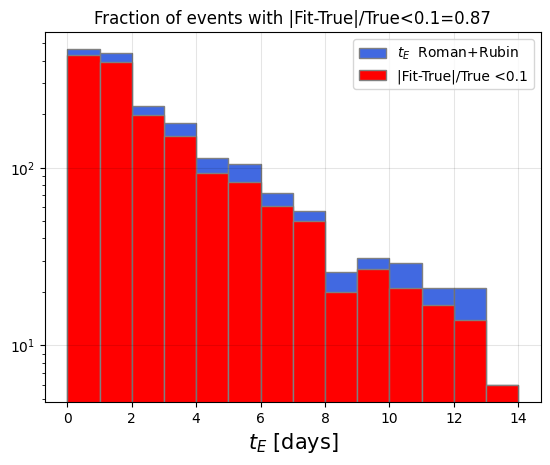

1764
0.0558986935820596
47.99839564320301


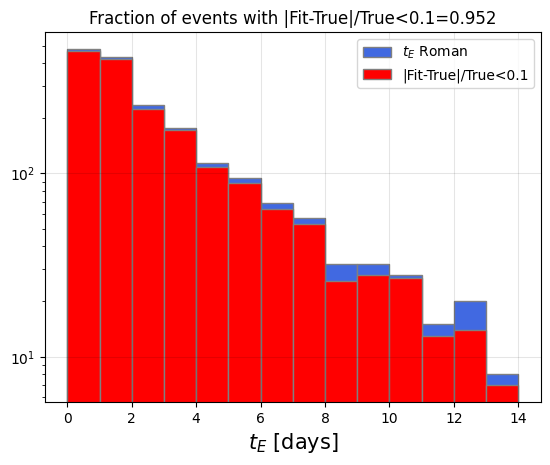

In [38]:
p='te'
indexes = met_1_rr['Source'][met_1_rr[p] <0.1].tolist()
print(len(indexes))
fit_rr['Source']
# print(indexes[0])
selected_rows = fit_rr[fit_rr['Source'].isin(indexes)]

plt.hist(fit_rr[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=f'${labels[p]}$  Roman+Rubin')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label=f'|Fit-True|/True <0.1')
plt.xlabel(f'${labels[p]}$ [days]',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.title('Fraction of events with |Fit-True|/True<0.1=' +str(round(len(indexes)/len(met_3_rr),3)))
plt.legend(loc='best')
plt.yscale('log')
plt.show()


indexes = met_1_roman['Source'][met_1_roman[p] <0.1].tolist()
print(len(indexes))
# fit_rr['Source']
# print(indexes[0])
selected_rows = fit_roman[fit_roman['Source'].isin(indexes)]

plt.hist(fit_roman[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=f'${labels[p]}$ Roman')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label=f'|Fit-True|/True<0.1')
plt.xlabel(f'${labels[p]}$ [days]',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.legend(loc='best')
plt.title('Fraction of events with |Fit-True|/True<0.1=' +str(round(len(indexes)/len(met_3_rr),3)))

# plt.title(round(len(indexes)/len(met_3_rr),3))
plt.yscale('log')
plt.show()

580
0.0735133529950779
47.99196779842403


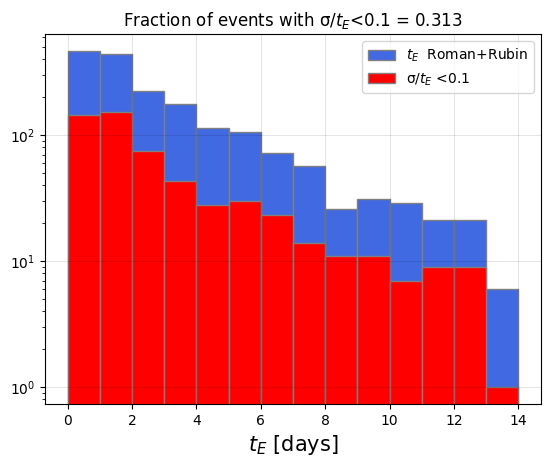

513
0.0901067738990274
47.99839564320301


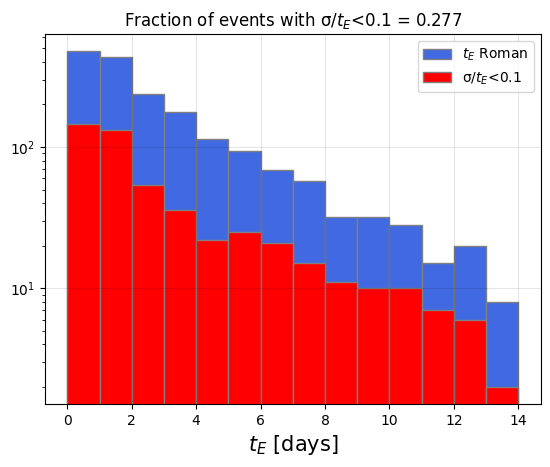

In [39]:
p='te'
indexes = met_3_rr['Source'][met_3_rr[p] <0.1].tolist()
print(len(indexes))
fit_rr['Source']
# print(indexes[0])
selected_rows = fit_rr[fit_rr['Source'].isin(indexes)]

plt.hist(fit_rr[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=f'${labels[p]}$  Roman+Rubin')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label=f'σ/${labels[p]}$ <0.1')
plt.xlabel(f'${labels[p]}$ [days]',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.title('Fraction of events with '+f'σ/${labels[p]}$<0.1 = '+str(round(len(indexes)/len(met_3_rr),3)))
plt.legend(loc='best')
plt.yscale('log')
plt.show()


indexes = met_3_roman['Source'][met_3_roman[p] <0.1].tolist()
print(len(indexes))
# fit_rr['Source']
# print(indexes[0])
selected_rows = fit_roman[fit_roman['Source'].isin(indexes)]

plt.hist(fit_roman[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=f'${labels[p]}$ Roman')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label=f'σ/${labels[p]}$<0.1')
plt.xlabel(f'${labels[p]}$ [days]',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.legend(loc='best')
plt.title('Fraction of events with '+f'σ/${labels[p]}$<0.1 = '+str(round(len(indexes)/len(met_3_rr),3)))
plt.yscale('log')
plt.show()


22
0.0451453332175384
24.14510449193919


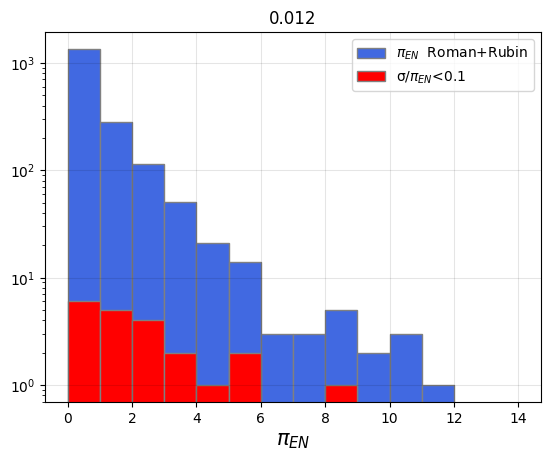

0.045145333221619
15.463456086056642


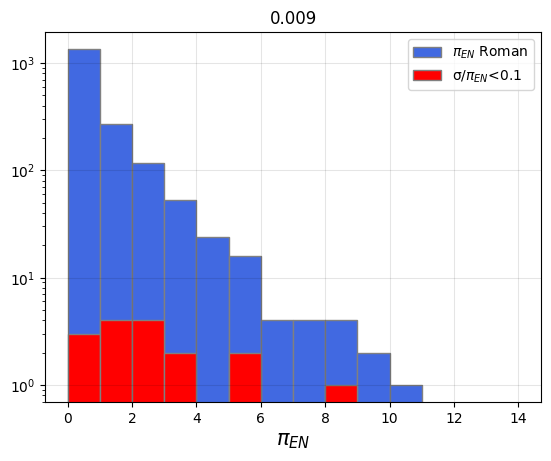

In [40]:
p='piEN'
indexes = met_3_rr['Source'][met_3_rr[p] <0.1].tolist()
print(len(indexes))
fit_rr['Source']
# print(indexes[0])
selected_rows = fit_rr[fit_rr['Source'].isin(indexes)]

plt.hist(fit_rr[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=r'$\pi_{EN}$  Roman+Rubin')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label='σ/$\pi_{EN}$<0.1')
plt.xlabel(f'${labels[p]}$',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.title(round(len(indexes)/len(met_3_rr),3))
plt.legend(loc='best')
plt.yscale('log')
plt.show()

indexes = met_3_roman['Source'][met_3_roman[p] <0.1].tolist()
selected_rows = fit_roman[fit_roman['Source'].isin(indexes)]
plt.hist(fit_roman[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=r'$\pi_{EN}$ Roman')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label='σ/$\pi_{EN}$<0.1')
plt.xlabel(f'${labels[p]}$',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.legend(loc='best')
plt.title(round(len(indexes)/len(met_3_rr),3))
plt.yscale('log')
plt.show()


942
-47.43054021883184
9.906542328017482


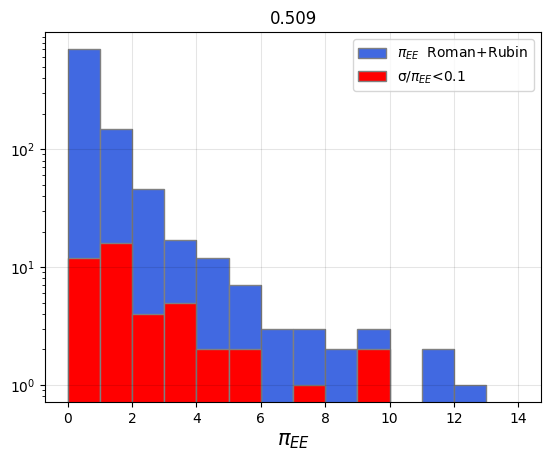

936
-47.21496135882637
9.883346819119822


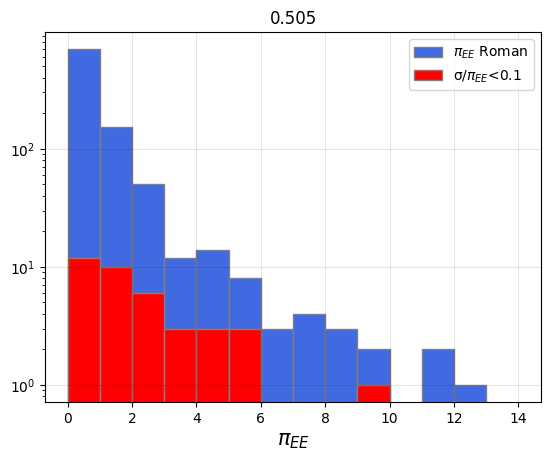

In [41]:
p='piEE'
indexes = met_3_rr['Source'][met_3_rr[p] <0.1].tolist()
print(len(indexes))
fit_rr['Source']
# print(indexes[0])
selected_rows = fit_rr[fit_rr['Source'].isin(indexes)]

plt.hist(fit_rr[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=r'$\pi_{EE}$  Roman+Rubin')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label='σ/$\pi_{EE}$<0.1')
plt.xlabel(f'${labels[p]}$',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.title(round(len(indexes)/len(met_3_rr),3))
plt.legend(loc='best')
plt.yscale('log')
plt.show()

p='piEE'
indexes = met_3_roman['Source'][met_3_roman[p] <0.1].tolist()
print(len(indexes))
# fit_rr['Source']
# print(indexes[0])
selected_rows = fit_roman[fit_roman['Source'].isin(indexes)]

plt.hist(fit_roman[p],color='royalblue',bins=np.arange(0,15,1),edgecolor='gray',label=r'$\pi_{EE}$ Roman')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,15,1),edgecolor='gray',label='σ/$\pi_{EE}$<0.1')
plt.xlabel(f'${labels[p]}$',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.legend(loc='best')
plt.title(round(len(indexes)/len(met_3_rr),3))
plt.yscale('log')
plt.show()


23
0.0089938895823924
0.2479821605598901


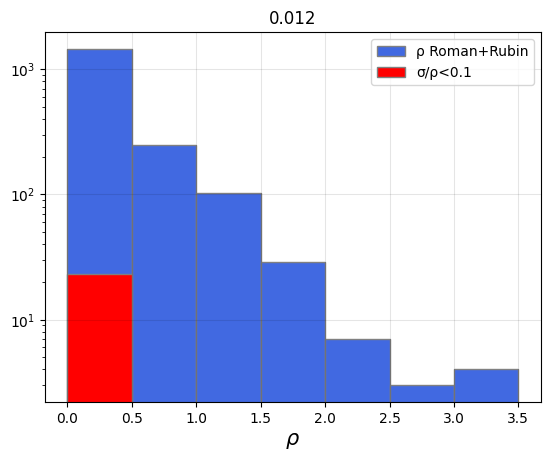

20
0.0089939132538972
0.2479867443548494


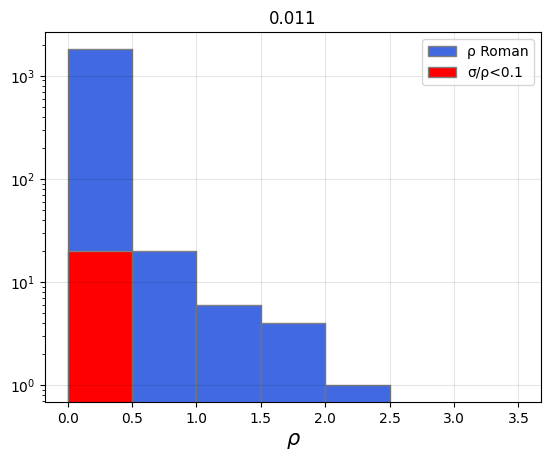

In [42]:
p='rho'
indexes = met_3_rr['Source'][met_3_rr[p] <0.1].tolist()
print(len(indexes))
fit_rr['Source']
# print(indexes[0])
selected_rows = fit_rr[fit_rr['Source'].isin(indexes)]

plt.hist(fit_rr[p],color='royalblue',bins=np.arange(0,4,0.5),edgecolor='gray',label='ρ Roman+Rubin')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,4,0.5),edgecolor='gray',label='σ/ρ<0.1')
plt.xlabel(f'${labels[p]}$',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.title(round(len(indexes)/len(met_3_rr),3))
plt.legend(loc='best')
plt.yscale('log')
plt.show()

p='rho'
indexes = met_3_roman['Source'][met_3_roman[p] <0.1].tolist()
print(len(indexes))
selected_rows = fit_roman[fit_roman['Source'].isin(indexes)]

plt.hist(fit_roman[p],color='royalblue',bins=np.arange(0,4,0.5),edgecolor='gray',label='ρ Roman')
plt.hist(selected_rows[p],color='red',bins=np.arange(0,4,0.5),edgecolor='gray',label='σ/ρ<0.1')
plt.xlabel(f'${labels[p]}$',fontsize=15)
plt.grid(True,color='k',alpha=0.1)
print(min(selected_rows[p]))
print(max(selected_rows[p]))
plt.legend(loc='best')
plt.title(round(len(indexes)/len(met_3_rr),3))
plt.yscale('log')
plt.show()

# plt.hist2d(fit_rr[p],met_3_rr[p], bins=(np.arange(0,0.5,0.05),np.arange(0,1,0.1)))
# plt.colorbar()
# plt.show()

# chequemos las distribuciones de parametros verdaderos que se guardaron y los que no


In [43]:
# true['rho'][true['rho']>1]

In [44]:

# txtfiles = [f for f in os.listdir('/home/anibal/test_results/FFP/set_sim1') if 'txt' in f]

# einstein_time = []

# labels=['t0','u0','te','rho','piEE','piEN']
# dict_micro = {'t0':[],'u0':[],'te':[],'rho':[],'piEE':[],'piEN':[]}
# for j in range(8):
#     npyfiles = [f for f in os.listdir(f'/home/anibal/test_results/FFP/set_sim{j+1}') if 'npy' in f]
#     for i in range(len(npyfiles)):
#         parameters = np.load(f'/home/anibal/test_results/FFP/set_sim{j+1}/'+npyfiles[i],allow_pickle=True).item()['params']
#         for k in range(6):
#             dict_micro[labels[k]].append(parameters[k])



# p = 'rho'
# print(len(dict_micro[p]))
# plt.hist(dict_micro[p],bins=15)
# plt.xlabel("$\\rho$")
# plt.semilogy()


In [45]:
# path_dir = path#'/home/anibal/results_roman_rubin/FFP_v6/FFP/'
# print(path)

In [46]:
# display(split_data)
rho_not_saved = []
radius_source_ns = []
check_rho = []
path_TRILEGAL = '/home/anibal/results_roman_rubin/TRILEGAL_sets/'

not_saved_params = {'t0':[],'u0':[],'te':[],'rho':[],'piEE':[],'piEN':[]}
for n_split in tqdm(range(1,9,1)):
    # print(n_split)
    path_dir = path_TRILEGAL+f'split_{n_split}.csv'
    split_data = pd.read_csv(path_dir,sep=',', decimal='.')
    split_more_data = pd.read_csv(path_dir)
    path_set_sim1 = path+f'set_sim{n_split}/'
    txt_set_sim1 = [f for f in os.listdir(path_set_sim1) if 'txt' in f]

    npy_set_sim1 = [f for f in os.listdir(path_set_sim1) if 'npy' in f]
    for key in not_saved_params:
        for i in range(len(npy_set_sim1)):
            not_saved_params[key].append(split_more_data.iloc[int(np.load(path_set_sim1+npy_set_sim1[i])[0])][key])
            rho_not_saved.append(split_data.iloc[int(np.load(path_set_sim1+npy_set_sim1[i])[0])]['rho'])
            check_rho.append(split_more_data.iloc[int(np.load(path_set_sim1+npy_set_sim1[i])[0])]['rho'])
            radius_source_ns.append(split_more_data.iloc[int(np.load(path_set_sim1+npy_set_sim1[i])[0])]['radius'])

  0%|          | 0/8 [00:00<?, ?it/s]

In [47]:
# print(rho_not_saved==check_rho)
# print(check_rho)

In [48]:
# print(len(radius_source_ns))

In [49]:
# plt.hist(radius_source_ns,bins=np.arange(0,510,10))
# plt.xticks([0,30,500])
# plt.yscale('log')
# plt.xlabel(r'radius source $[R_{\odot}$]')

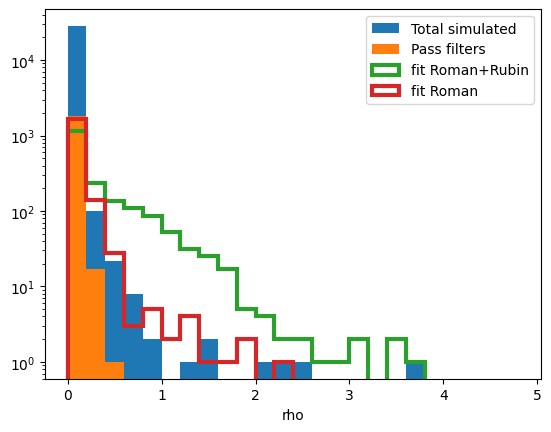

In [50]:
# print(len(rho_not_saved))
# for key in not_saved_params:
key = 'rho'
plt.hist(not_saved_params[key],bins=np.arange(0,5,0.2),label='Total simulated')
plt.hist(true[key],bins=np.arange(0,5,0.2),label='Pass filters')
plt.hist(fit_rr[key],histtype='step',lw=3,bins=np.arange(0,5,0.2),label='fit Roman+Rubin')
plt.hist(fit_roman[key],histtype='step',lw=3,bins=np.arange(0,5,0.2),label='fit Roman')
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(key)
plt.show()


/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


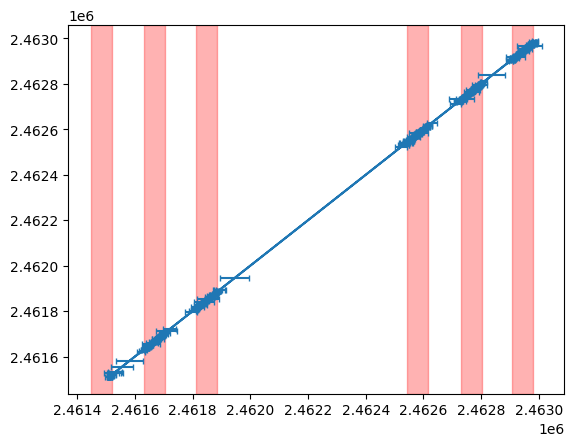

In [51]:
from astropy.time import Time
nominal_seasons = [
    {'start': '2027-02-11T00:00:00', 'end': '2027-04-24T00:00:00'},
    {'start': '2027-08-16T00:00:00', 'end': '2027-10-27T00:00:00'},
    {'start': '2028-02-11T00:00:00', 'end': '2028-04-24T00:00:00'},
    {'start': '2030-02-11T00:00:00', 'end': '2030-04-24T00:00:00'},
    {'start': '2030-08-16T00:00:00', 'end': '2030-10-27T00:00:00'},
    {'start': '2031-02-11T00:00:00', 'end': '2031-04-24T00:00:00'},
]


%matplotlib inline

plt.close('all')
for i in range(len(nominal_seasons)):
    tstart1 = Time(nominal_seasons[i]['start'], format='isot').jd
    tend1 = Time(nominal_seasons[i]['end'], format='isot').jd
    plt.axvspan(tstart1,tend1, alpha=0.3,color='red')
    
plt.errorbar(fit_rr['t0'],fit_rr['t0'], yerr=None, xerr=fit_rr['te'],capsize=2)
plt.show()

In [52]:
# Bins

([<matplotlib.axis.XTick at 0x7fc7d5539510>,
 [Text(2461509.068175404, 0, '2.461509'),
  Text(2462248.7648696844, 0, '2.462249'),
  Text(2462988.4615639653, 0, '2.462988')])

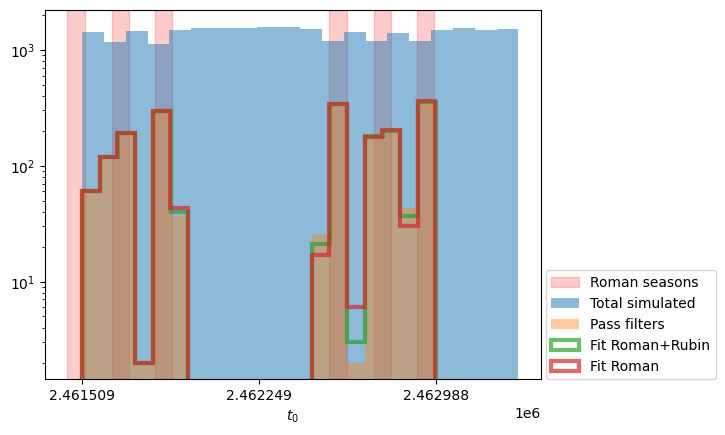

In [53]:

plt.close('all')
for i in range(len(nominal_seasons)-1):
    tstart1 = Time(nominal_seasons[i]['start'], format='isot').jd
    tend1 = Time(nominal_seasons[i]['end'], format='isot').jd
    plt.axvspan(tstart1,tend1, alpha=0.2,color='red')
tstart1 = Time(nominal_seasons[len(nominal_seasons)-1]['start'], format='isot').jd
tend1 = Time(nominal_seasons[len(nominal_seasons)-1]['end'], format='isot').jd
plt.axvspan(tstart1,tend1, alpha=0.2,color='red', label='Roman seasons')

Bins=20
key = 't0'
plt.hist(not_saved_params[key], bins=Bins, label='Total simulated', alpha=0.5)
plt.hist(true[key], bins=Bins, label='Pass filters', alpha=0.4)
plt.hist(fit_rr[key], histtype='step', lw=3, bins=Bins, label='Fit Roman+Rubin', alpha=0.7)
plt.hist(fit_roman[key], histtype='step', lw=3, bins=Bins, label='Fit Roman', alpha=0.7)
plt.legend(loc=(1.01,0))
plt.xlabel(r'$t_0$')
plt.yscale('log')
plt.xticks([min(true[key]), (min(true[key])+max(true[key]))/2,max(true[key])])

t0
u0
te
rho
piEE
piEN


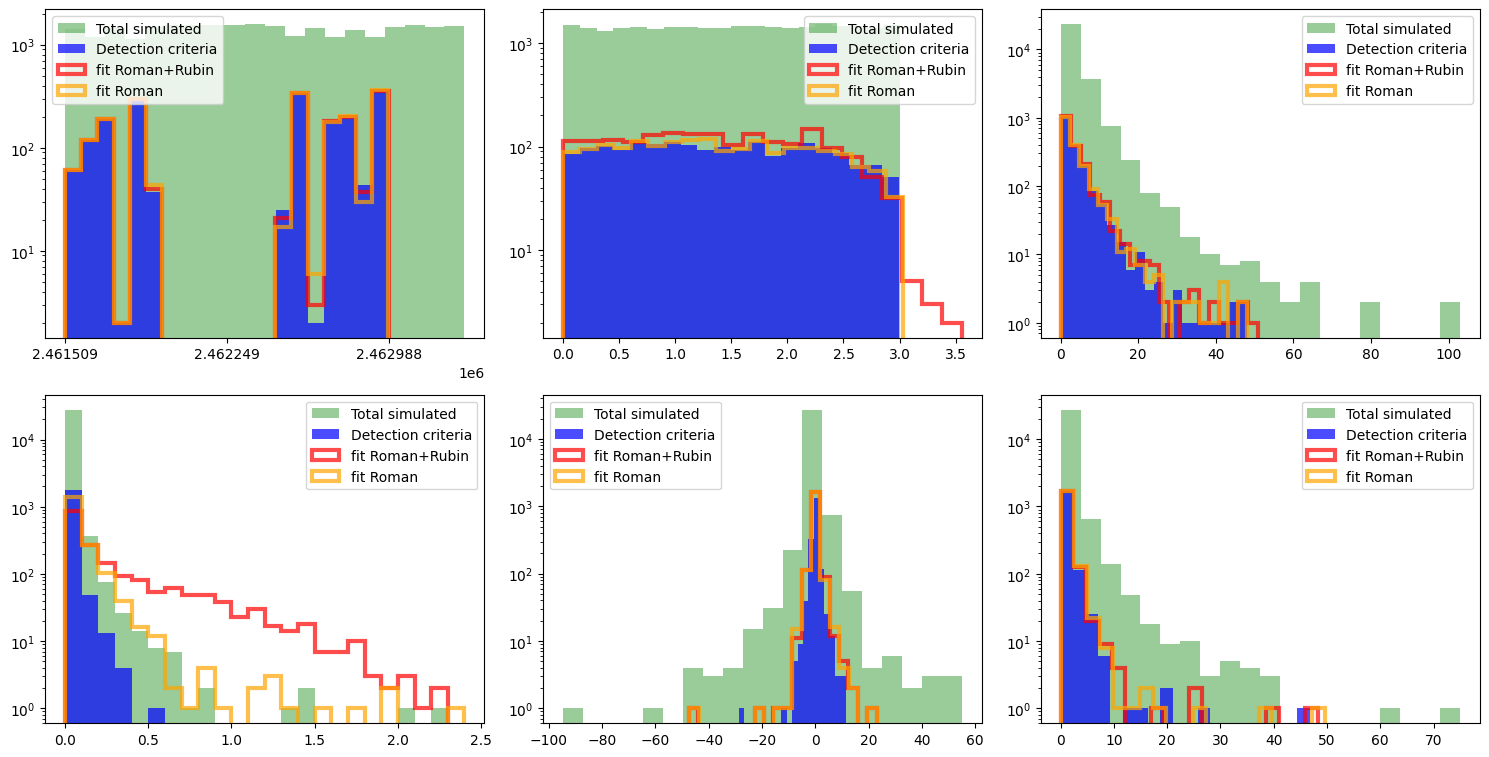

In [54]:
# Define the number of rows and columns in the grid
num_rows = 2
num_cols = 3
plt.close('all')
# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
# fig.suptitle('Histograms of Parameters')

# Flatten the 2D array of subplots for easier indexing
axes = np.ravel(axes)

# Loop over each key and plot on the corresponding subplot
for i, key in enumerate(not_saved_params):
    print(key)
    if key=='rho':
        Bins = np.arange(0,2.5,0.1)
    else:
        Bins=20
    ax = axes[i]
    ax.hist(not_saved_params[key], bins=Bins,color='green', label='Total simulated', alpha=0.4)
    ax.hist(true[key], bins=Bins, color='blue',label='Detection criteria', alpha=0.7)
    ax.hist(fit_rr[key], histtype='step',color='red', lw=3, bins=Bins, label='fit Roman+Rubin', alpha=0.7)
    ax.hist(fit_roman[key], histtype='step',color='orange', lw=3, bins=Bins, label='fit Roman', alpha=0.7)
    ax.set_yscale('log')
    ax.legend(loc='best')
    # ax.set_xlabel(f'${labels[key]}$',fontsize=15)
    if key=='t0':
        ax.set_xticks([min(true[key]), (min(true[key])+max(true[key]))/2,max(true[key])])
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Display the plots
plt.show()

# plot lightcurves

In [55]:
# %matplotlib inline
# plt.close('all')
# plt.hist(met_1_rr['rho'], bins=np.arange(0,1,0.1))
# plt.hist(met_1_rr['rho'][met_1_rr['rho']<0.4],bins=np.arange(0,1,0.1))
# plt.show()

# display(met_1_rr['Source'][(met_1_rr['rho']<0.1) & (met_1_rr['piEE']<0.1)])

In [56]:
# path

In [57]:

# %matplotlib widget

# print(file_name)

# pyLIMA_plots.plot_lightcurves(model(path_set_fit[j]+file_name, 'fspl') , [best_model(path_set_fit[j]+file_name)[key] for key in best_model(path_set_fit[j]+file_name)])

In [58]:
# true[(true['q']<0.3) & (true['u0']<0.1)]

In [124]:
true

,Source,t0,u0,te,rho,piEN,piEE
0,7048,2.461867e+06,0.958860,5.304479,0.005191,0.117605,0.663040
1,5509,2.462935e+06,1.157879,0.488165,0.012749,0.202870,-0.158720
2,8077,2.461699e+06,0.997152,0.352109,0.100333,9.231437,9.608443
3,6029,2.461666e+06,2.100279,1.043543,0.004914,0.103368,-0.640537
4,6030,2.461658e+06,2.415128,1.574815,0.006631,0.645699,0.556609
...,...,...,...,...,...,...,...
1847,40499,2.461676e+06,1.188585,2.865123,0.006718,0.136439,0.959557
1848,43571,2.462966e+06,1.264450,43.998949,0.011345,0.515885,0.841394
1849,43578,2.461846e+06,0.183735,0.648324,0.056215,0.266974,0.095632
1850,41022,2.461858e+06,0.855720,0.826367,0.011323,0.311540,-0.218805


In [110]:
# inset axes....

# 40006
# 41103
# 43161
# 40274
# 40448

Nset = 1
nsource = 7048
number_event = int(nsource-Nset*5000)
file_name = f'Event_RR_{number_event}_trf.npy'
# ,'s','q','alpha'
true_par = [true[true['Source']==nsource][['t0','u0','te','rho','piEN','piEE']][f].values[0] for f in true[true['Source']==7048][['t0','u0','te','rho','piEN','piEE']]]
# true_par
# j=Nset-1
j=0
print(true_par)
print([best_model(path_set_fit[j]+file_name)[key] for key in best_model(path_set_fit[j]+file_name)])

[2461866.916660117, 0.958859945991424, 5.304479308754482, 0.0051913573025724, 0.1176049075598844, 0.6630401186792089]
[2461866.939952495, 0.9566057774601802, 5.299673879006446, 0.03695842738919241, 0.22112425948340828, 0.16214336420274722]


['t0', 'u0', 'te', 'rho', 'piEN', 'piEE']

/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41568 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41568 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 131 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 131 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/pyLIMA/lib/python3.11/site-packages/erfa/core.py:154: Er

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

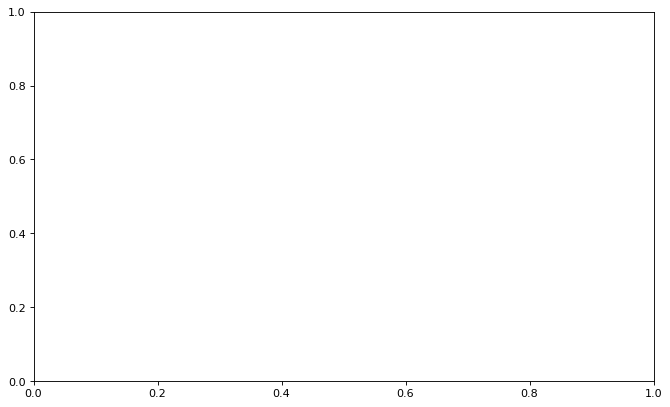

In [125]:

# Nset = 8
# nsource = 41103
# number_event = int(nsource-Nset*5000)
file_name = f'Event_RR_{number_event}_trf.npy'
# j=Nset-1
# j=0

# file_name = [f for f in os.listdir(path_set_fit[j]) if 'RR' in f][0]

filas = 1
columnas = 1
mat_figure, mat_figure_axes = plt.subplots(filas, columnas, figsize=(10, 6), dpi=80)  # Create a 2x4 grid of subplots with a specific size

file_name = f'Event_RR_{number_event}_trf.npy'
params = [best_model(path_set_fit[j]+file_name)[key] for key in best_model(path_set_fit[j]+file_name)]
mat_figure, dict_data, dict_model = plot_LCmodel(model(path_set_fit[j]+file_name, 'usbl')
                                         ,params
                                         ,mat_figure, mat_figure_axes)

file_name = f'Event_Roman_{number_event}_trf.npy'
params = [best_model(path_set_fit[j]+file_name)[key] for key in best_model(path_set_fit[j]+file_name)]
mat_figure, dict_data_roman, dict_model_roman = plot_LCmodel(model(path_set_fit[j]+file_name, 'usbl')
                                         ,params
                                         ,mat_figure, mat_figure_axes)

# file_name = f'Event_Roman_{number_event}_trf.npy'
# true_par = [true[true['Source']==nsource][['t0','u0','te','rho','piEN','piEE']][f].values[0] for f in true[true['Source']==nsource][['t0','u0','te','rho','piEN','piEE']]]
# true_par
file_name = f'Event_RR_{number_event}_trf.npy'
true_par = [true[true['Source']==nsource][[list(best_model(path_set_fit[j]+file_name).keys())]][f].values[0] for f in true[true['Source']==nsource][['t0','u0','te','rho','piEN','piEE']]]
mat_figure, dict_data_treu, dict_model_true = plot_LCmodel(model(path_set_fit[j]+file_name, 'usbl')
                                         ,true_par,mat_figure, mat_figure_axes)

# par = [best_model(path_set_fit[j]+file_name)[key] for key in best_model(path_set_fit[j]+file_name)]
# mat_figure_axes.set_xlim(par[0]-20*par[2],par[0]+20*par[2])
# mat_figure_axes.set_xlabel('Time JD [day]', fontsize=20)
# mat_figure_axes.set_ylabel('magnitude', fontsize=20)
# mat_figure_axes.invert_yaxis()

# x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
# axins = mat_figure_axes.inset_axes(
#     [0.5, 0.5, 0.47, 0.47],
#     xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
# # .imshow(Z2, extent=extent, origin="lower")
# axins.errorbar(dict_data['F146'][0],dict_data['F146'][1],dict_data['F146'][2], marker='o',linestyle='')
# axins.plot(dict_model['F146'][0],dict_model['F146'][1])
# mat_figure_axes.indicate_inset_zoom(axins, edgecolor="black")

# mat_figure_axes.legend(shadow=True, fontsize='large',
#                               bbox_to_anchor=(0, 1.02, 1, 0.2),
#                               loc="lower left",
#                               mode="expand", borderaxespad=0, ncol=3)



In [ ]:
# Your existing code
filas = 1
columnas = 1
mat_figure, mat_figure_axes = plt.subplots(filas, columnas, figsize=(10, 6), dpi=80)
filt = [f for f in dict_model_true.keys() if not f=='F146'][0]
mat_figure_axes.plot(dict_model_true[filt][0], dict_model_true[filt][1], color='red',linestyle='-',lw=2,zorder=0)
# mat_figure_axes.plot(dict_model_true['F146'][0], dict_model_true['F146'][1], color='red',linestyle='-',lw=2,zorder=1)

for f in dict_data:
    # if f == 'F146':
    mat_figure_axes.errorbar(dict_data[f][0], dict_data[f][1], dict_data[f][2], marker='o',alpha=0.5, linestyle='',zorder=1,label=f)



# mat_figure_axes.set_xlim(par[0] - 20 * par[2], par[0] + 20 * par[2])
mat_figure_axes.set_xlabel('Time JD [day]', fontsize=20)
mat_figure_axes.set_ylabel('Magnitude', fontsize=20)
mat_figure_axes.invert_yaxis()
# mat_figure_axes.legend(loc=(0,1.01), ncols=len(dict_data), fontsize=14)
mat_figure_axes.legend(shadow=True, fontsize='large',
                              bbox_to_anchor=(0, 1.02, 1, 0.2),
                              loc="lower left",
                              mode="expand", borderaxespad=0, ncol=3)

# Create inset axis
axins = inset_axes(mat_figure_axes, width="45%", height="45%", loc='upper left')
axins.plot(dict_model_true[filt][0], dict_model_true[filt][1], color='red',linestyle='-',lw=2,zorder=1)
# axins.plot(dict_model_true['F146'][0], dict_model_true['F146'][1], color='red',linestyle='-',lw=1,zorder=1)
mins = []
maxs = []
for f in dict_data:
    # if f == 'F146':
    mins.append(min(dict_data[f][1]))
    maxs.append(max(dict_data[f][1]))
    axins.errorbar(dict_data[f][0], dict_data[f][1], dict_data[f][2], marker='o',alpha=0.5, linestyle='',zorder=0)

# Set limits for the inset axis
axins.set_xlim(true_par[0] - 0.2* true_par[2], true_par[0] + 0.2 * true_par[2])
# axins.set_ylim(max(maxs)-0.0001*max(maxs),min(mins)+0.0001*min(mins))
axins.set_yticks([])
axins.set_xticks([])
axins.invert_yaxis()
# Mark the region in the main plot corresponding to the inset axis
# mark_inset(mat_figure_axes, axins, loc1=3, loc2=4, fc="none", ec="k")

plt.show()


In [ ]:
# plt.hist(true['u0'])

In [ ]:
# plt.hist(true['s'])

In [ ]:
# plt.hist2d( fit_rr['rho'], fit_rr['u0'], bins=(np.arange(0,3,0.1),np.arange(0,3,0.1)))

# plt.xlabel( r'$\rho$', fontsize=20)
# plt.ylabel( r'$u_0$', fontsize=20)
# plt.show()

In [100]:
# fit_rr[[fit_rr['u0'], fit_rr['rho'],fit_rr['rho']]]
#.to_array()

In [98]:
# samples

In [99]:
# true[(true['rho']**2-true['u0']**2)>0]

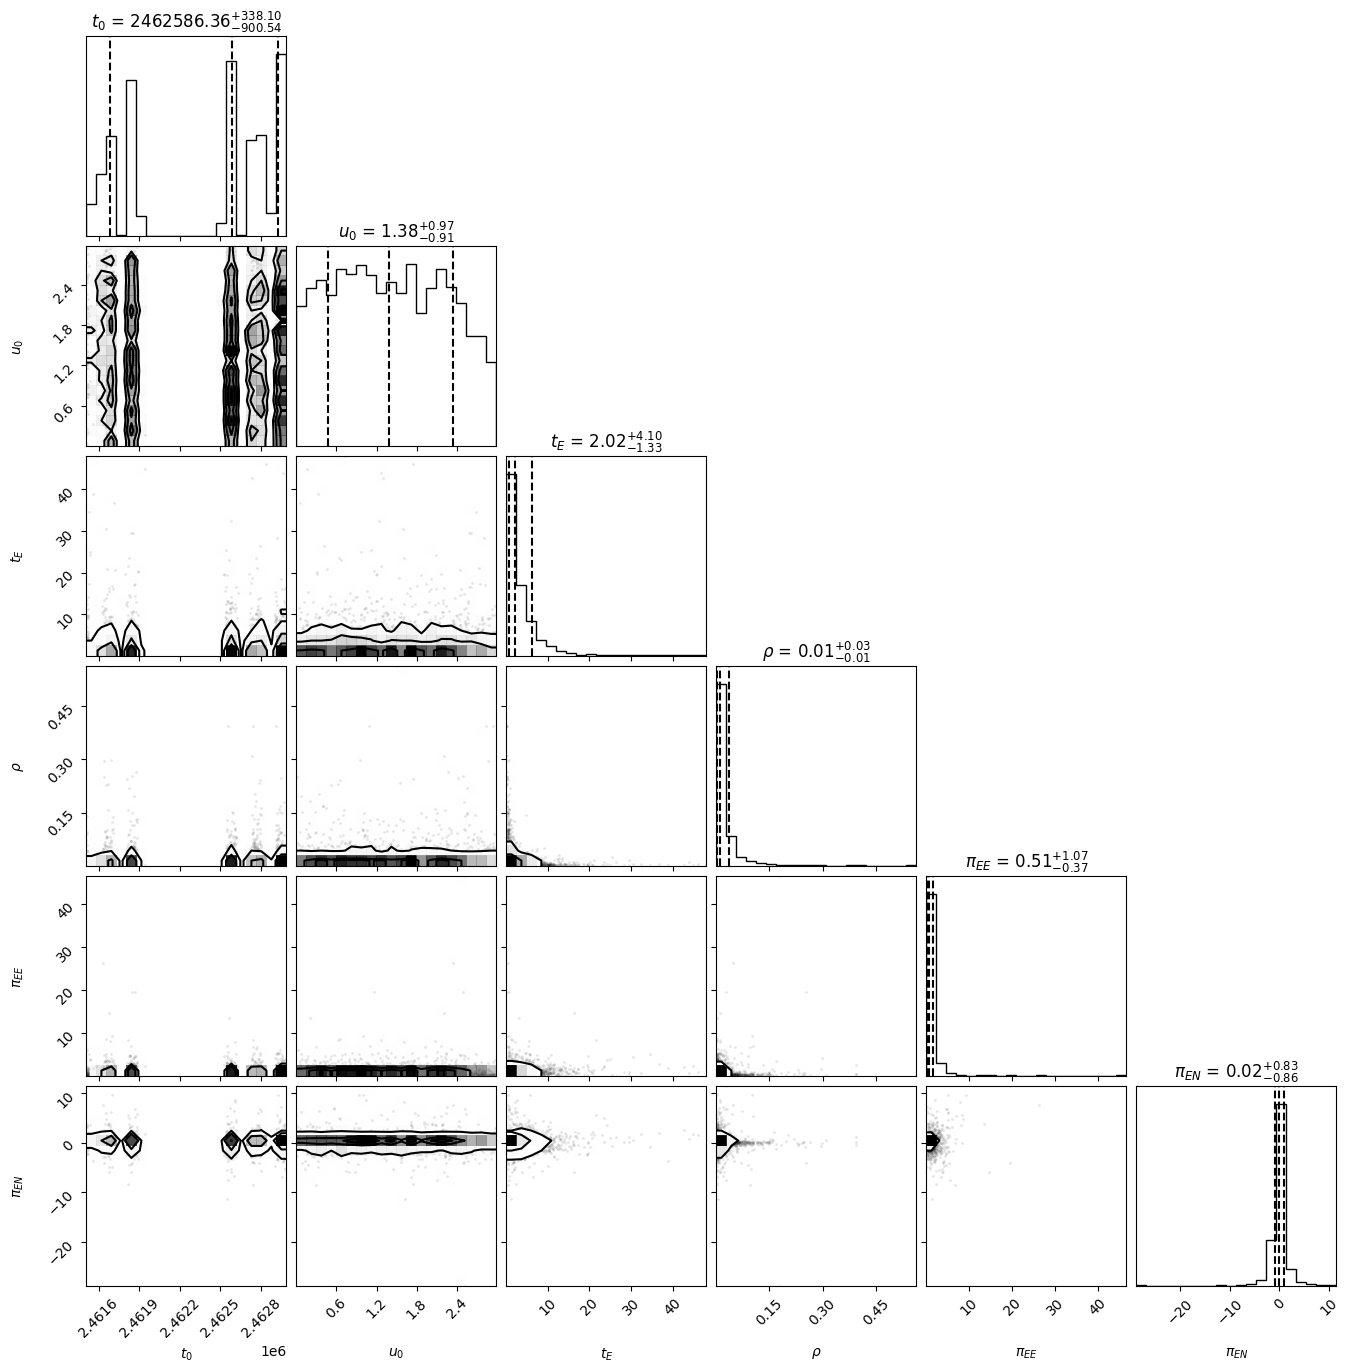

In [102]:
import corner
import numpy as np
# samples = fit_rr[['t0','u0','te','rho','piEN','piEE']]
samples = true[['t0','u0','te','rho','piEN','piEE']]

figure = corner.corner(samples,labels=[
        r"$t_0$",
        r"$u_0$",
        r"$t_E$",
        r"$\rho$",
        r"$\pi_{EE}$",
        r"$\pi_{EN}$",
        ],
        quantiles=[0.16, 0.5, 0.84],
        show_titles=True,
        title_kwargs={"fontsize": 12},
        )

In [96]:
true[true['rho']>true['u0']]

,Source,t0,u0,te,rho,piEN,piEE
22,8619,2.462791e+06,0.000534,0.170773,0.041900,0.327036,0.053410
126,6248,2.462606e+06,0.011679,1.522076,0.021869,0.617989,0.383056
159,5307,2.462760e+06,0.018322,3.275037,0.018924,0.900309,1.523342
286,12092,2.461682e+06,0.008098,2.356693,0.015341,0.352651,2.175278
343,12727,2.461861e+06,0.066717,0.198338,0.196447,0.079662,0.371414
695,16389,2.461639e+06,0.013907,1.199003,0.014952,0.241422,0.289565
705,15892,2.462941e+06,0.080123,0.261337,0.152719,0.028839,0.080718
1020,20977,2.462740e+06,0.018935,2.269969,0.063402,0.142835,0.116938
1070,30574,2.461514e+06,0.017875,3.112217,0.021670,6.034735,3.144791
1130,32220,2.462909e+06,0.009086,0.756469,0.012362,0.177211,0.029393


In [104]:
# plt.hist2d(true['u0'],true['rho'])
# plt.hist()